In [127]:
from collections.abc import Iterable
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
from sympy.abc import x
from sympy.calculus.util import continuous_domain

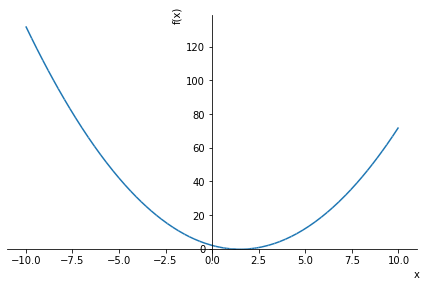

In [128]:
from typing import List

f = x**2 - 3*x + 2

g = {
    1:(x**2 + 2) / 3,
    2:sqrt(3*x - 2),
    3:3 - 2 / x,
    4:(x**2 - 2) / (2*x -3)
}

plot(f)

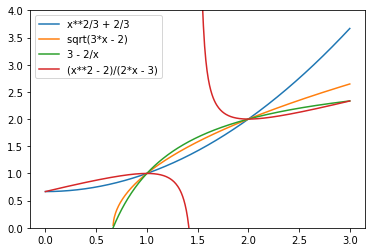

In [129]:
for g_i in g.values():
    x_v = np.linspace(0, 3, 500)
    gl = lambdify(x, g_i)

    inter = continuous_domain(g_i, x, S.Reals)
    #todo przeniesc to do jakiejs funckji
    not_in = S.Reals - inter

    if type(not_in) is FiniteSet:
        p = plt.plot([], [], label = g_i)
        for idk in not_in:
            n_x = x_v[x_v < idk]
            x_v = x_v[x_v > idk]

            plt.plot(n_x, gl(n_x), c=p[0].get_c())
        plt.plot(x_v, gl(x_v), c=p[0].get_c())
    else:
        x_v = np.array([x_i for x_i in x_v if x_i in inter])
        plt.plot(x_v, gl(x_v),label = g_i)

plt.ylim([0, 4])
plt.legend()
plt.show()



In [130]:
for g_i in g.values():
    g_i_diff = diff(g_i, x)

    gld = lambdify(x, g_i_diff)
    print(gld(2))

1.3333333333333333
0.75
0.5
0.0


In [131]:
def iteration_scheme(f, g, n=10):
    x_v = 1.51
    print(g)
    gl = lambdify(x, g)
    for i in range(n):
        x_v = gl(x_v)

        print(x_v)
    return x_v

iteration_scheme(f, g[4])

(x**2 - 2)/(2*x - 3)
14.004999999999988
7.762496001599354
4.65120809338386
3.11527137309365
2.385022063896282
2.0837504485675318
2.0060078220517648
2.0000356653832534
2.0000000012719292
2.0


2.0

In [132]:
def newtons_method(f, n=10):
    fl = lambdify(x, f)
    f_diff = diff(f, x)
    fld = lambdify(x, f_diff)

    x_v = 1.51

    for i in range(n):
        x_v = x_v - fl(x_v)/fld(x_v)
        print(x_v)
    return x_v

fn = [
    x**3 - 2*x - 5,
    exp(-x)-x,
    x*sin(x)-1
]

newtons_method(fn[0])

2.455612668636242
2.151313671962719
2.0962857951806777
2.09455317252634
2.0945514815439363
2.0945514815423265
2.0945514815423265
2.0945514815423265
2.0945514815423265
2.0945514815423265


2.0945514815423265

In [194]:
def newtons_method_k_dimensions(f_list: List, n, symbols):
    def eval(matrix):
        return np.array(matrix.subs(x_v), dtype='float')
    f_matrix = Matrix(f_list)
    jacobian = f_matrix.jacobian(Matrix(list(symbols)))

    k = len(f_list)
    x_v = [(s, 1.51) for s in symbols]
    x_v = np.array(x_v)

    for i in range(n):
        s = np.linalg.solve(eval(jacobian), -eval(f_matrix))
        idk = x_v[:, 1].reshape(k, 1)
        idk += s
        print(x_v)

x1 = Symbol('x1')
x2 = Symbol('x2')

f1 = x1**2 + x2**2 - 1
f2 = x1**2 - x2**2

newtons_method_k_dimensions([f1, f2], 10, f1.free_symbols)

[[x2 0.9205629139072848]
 [x1 0.9205629139072847]]
[[x2 0.7318544219549014]
 [x1 0.7318544219549012]]
[[x2 0.7075252016436949]
 [x1 0.7075252016436949]]
[[x2 0.7071069049105354]
 [x1 0.7071069049105354]]
[[x2 0.7071067811865583]
 [x1 0.7071067811865583]]
[[x2 0.7071067811865475]
 [x1 0.7071067811865475]]
[[x2 0.7071067811865476]
 [x1 0.7071067811865476]]
[[x2 0.7071067811865475]
 [x1 0.7071067811865475]]
[[x2 0.7071067811865476]
 [x1 0.7071067811865476]]
[[x2 0.7071067811865475]
 [x1 0.7071067811865475]]
